介绍了pytorch中的常见优化器，包括SGD、RMSprop和Adam等

In [1]:
import torch
import torch.utils.data as Data
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
# 1. 构造数据
x = torch.unsqueeze(torch.linspace(-1, 1, 1000), dim=1)
y = x.pow(2) + 0.1*torch.normal(torch.zeros_like(x))

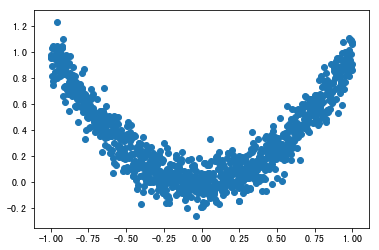

In [3]:
# 2. 可视化原始数据
plt.scatter(x,y)
plt.show()

In [4]:
# 定义常量
LR = 0.01
BATCH_SIZE = 32
EPOCH = 12

In [5]:
# 3. 数据loader
torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(dataset=torch_dataset, shuffle=True, batch_size=BATCH_SIZE)

In [7]:
# 4. 搭建模型
net = torch.nn.Sequential(
    torch.nn.Linear(1,10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,1)
)
net

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [10]:
# 5. 开始训练
# 不同的网络
import copy
net_SGD         = copy.deepcopy(net)
net_Momentum    = copy.deepcopy(net)
net_RMSprop     = copy.deepcopy(net)
net_Adam        = copy.deepcopy(net)
nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]

# 不同的优化器
opt_SGD         = torch.optim.SGD(net_SGD.parameters(), lr=LR)
opt_Momentum    = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)
opt_RMSprop     = torch.optim.RMSprop(net_RMSprop.parameters(), lr=LR, alpha=0.9)
opt_Adam        = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.9, 0.99))
optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]

# 存储损失函数
loss_fun = torch.nn.MSELoss()
losses_his = [[], [], [], []]

# 训练
for epoch in range(EPOCH):
    print("-----Epoch{}-----".format(epoch))
    for step, (b_x, b_y) in enumerate(loader):
        for net, optimizer, l_his in zip(nets, optimizers, losses_his):
            output = net(b_x)
            loss = loss_fun(output, b_y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            l_his.append(loss.data.numpy())

-----Epoch0-----
-----Epoch1-----
-----Epoch2-----
-----Epoch3-----
-----Epoch4-----
-----Epoch5-----
-----Epoch6-----
-----Epoch7-----
-----Epoch8-----
-----Epoch9-----
-----Epoch10-----
-----Epoch11-----


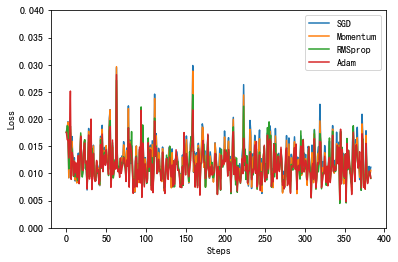

In [14]:
# 6. 绘制损失函数曲线
labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
for i, l_his in enumerate(losses_his):
        plt.plot(l_his, label=labels[i])
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0, 0.04))
plt.show()